# ein Python programm zur Analyse eine .har datei

Es soll eine Webseite analyiert werden, in der eine har datei geprüft wird

In [52]:
url = "https://www.heise.de"
url = "https://youtube.com"
url = "https://pad.sonnix.de/"
url = "https://spiegel.de"

In [45]:
# Laden der Webseite und speichern als HAR-Datei
import asyncio
from playwright.async_api import async_playwright
import os


filepath = url.replace('https://','')
filepath = filepath.replace('http://','')
filepath = filepath.replace('.','_')
filepath = filepath.replace('/','')
filepath = f"./daten/{filepath}.har"

# Erstellen Sie den Pfad, falls er nicht existiert
os.makedirs(os.path.dirname(filepath), exist_ok=True)

async def create_har_file_firefox():
    async with async_playwright() as p:
        browser = await p.firefox.launch()
        context = await browser.new_context(
            record_har_path=filepath
        )
        page = await context.new_page()
        await page.goto(url)
        await page.wait_for_load_state("networkidle")
        await context.close()
        await browser.close()

# In Jupyter Notebook direkt ausführen
await create_har_file_firefox()
print ("Das Ergebnise wurde gespeichert in: ", filepath)



Das Ergebnise wurde gespeichert in:  ./daten/spiegel_de.har


In [65]:
filepath = "daten/www.spiegel.de.har"
filepath= "daten/www.spiegel.de_ublock.har"

In [71]:
# Anlayse der HAR-Datei
import json
from haralyzer import HarParser
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, HTML

# Laden der HAR-Datei
with open(filepath, 'r') as f:
    har_data = json.load(f)

# Initialisieren des HarParser
har_parser = HarParser(har_data)

# Erstellen einer Liste für die Daten und URLs
data = []
urls = []
# Durchlaufen aller Seiten in der HAR-Datei
for page in har_parser.pages:
    for entry in page.entries:
        url = entry['request']['url']
        if url.startswith('data:'):
            continue
        domain = url.split('/')[2]
        bytes_transferred = entry['response']['bodySize']
        
        # Hinzufügen der Daten zur Liste
        data.append({'domain': domain, 'bytes': bytes_transferred})
        # Hinzufügen der URL zur Liste
        urls.append(url)
print("Anzahl der URLs: ", len(urls))

Anzahl der URLs:  96


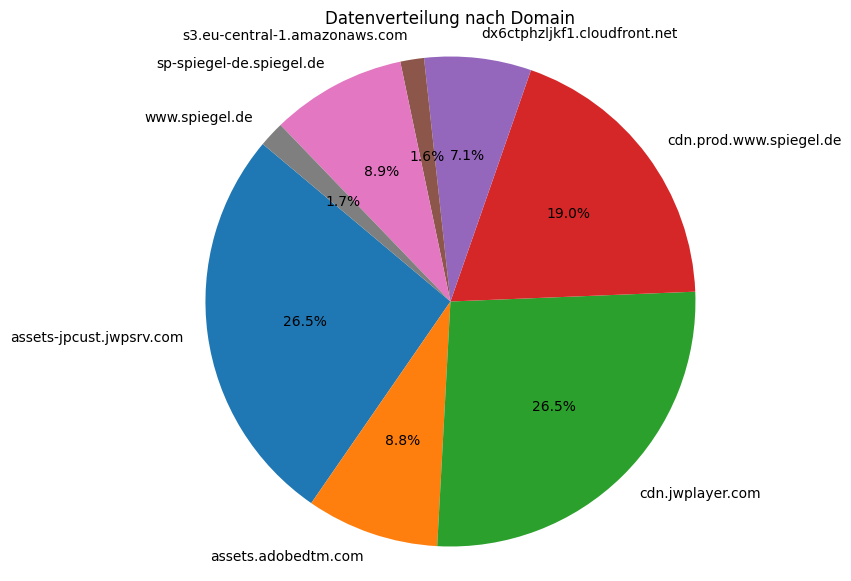

In [72]:
# Ausgabe als Kuchendiagramm
# Erstellen eines DataFrames aus der Liste
df = pd.DataFrame(data)

# Gruppieren nach Domain und Summieren der übertragenen Bytes
domain_data = df.groupby('domain').sum().reset_index()

for index, row in domain_data.iterrows():
    if row['bytes'] < 0:
        domain_data.loc[index, 'bytes'] = 10
# Erstellen des Kuchendiagramms
plt.figure(figsize=(10, 7))
plt.pie(domain_data['bytes'], labels=domain_data['domain'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Gleichmäßiges Kreisdiagramm
plt.title('Datenverteilung nach Domain')
plt.show()


In [70]:
# Ausgabe der gefundenen URLs
from IPython.display import display, Markdown

# Erstellen einer einzelnen Markdown-Zeichenfolge
markdown_text = "## Gefundene URLs:\n"
for url in urls:
    markdown_text += f"- [{url}]({url})\n"

# Anzeigen der gesamten Markdown-Zeichenfolge
display(Markdown(markdown_text))



## Gefundene URLs:
- [https://www.spiegel.de/](https://www.spiegel.de/)
- [https://cdn.prod.www.spiegel.de/public/spon/generated/css/styles.78932e0e0a0c86985c51.css](https://cdn.prod.www.spiegel.de/public/spon/generated/css/styles.78932e0e0a0c86985c51.css)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/js/commons.69599ab51851318f6930.js](https://cdn.prod.www.spiegel.de/public/shared/generated/js/commons.69599ab51851318f6930.js)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/js/header.60544321707142ecd7dd.js](https://cdn.prod.www.spiegel.de/public/shared/generated/js/header.60544321707142ecd7dd.js)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/js/vendors.f1c4f8bff0ebc606b86f.js](https://cdn.prod.www.spiegel.de/public/shared/generated/js/vendors.f1c4f8bff0ebc606b86f.js)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/js/index.f9ed19ce4e1f705b9cdd.js](https://cdn.prod.www.spiegel.de/public/shared/generated/js/index.f9ed19ce4e1f705b9cdd.js)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Bold.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Bold.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Regular.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Regular.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSlab4UICd-ExtraBold.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSlab4UICd-ExtraBold.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4-6SemiBold.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4-6SemiBold.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Regular.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Regular.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Italic.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Italic.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Bold.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Bold.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-BoldItalic.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-BoldItalic.woff2)
- [https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifDisplayUI-BoldItalic.woff2](https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifDisplayUI-BoldItalic.woff2)
- [https://cdn.prod.www.spiegel.de/public/spon/images/modal/user-capping_720.png](https://cdn.prod.www.spiegel.de/public/spon/images/modal/user-capping_720.png)
- [https://cdn.prod.www.spiegel.de/images/fef37c8e-09c9-4ed4-bb33-f9db74abc682_w640_r1.778_fpx47.95_fpy50.webp](https://cdn.prod.www.spiegel.de/images/fef37c8e-09c9-4ed4-bb33-f9db74abc682_w640_r1.778_fpx47.95_fpy50.webp)
- [https://s3.eu-central-1.amazonaws.com/prod.iqdcontroller.iqdigital/cdn_iqdspiegel/live/iqadcontroller.js.gz](https://s3.eu-central-1.amazonaws.com/prod.iqdcontroller.iqdigital/cdn_iqdspiegel/live/iqadcontroller.js.gz)
- [https://assets.adobedtm.com/cc10f7b4369d/32ae8c3350c5/launch-8a2e39fde471.min.js](https://assets.adobedtm.com/cc10f7b4369d/32ae8c3350c5/launch-8a2e39fde471.min.js)
- [https://cdn.prod.www.spiegel.de/images/41f7187f-9013-4c07-bed3-793aa9af7a2c_w488_r1.778_fpx37_fpy47.webp](https://cdn.prod.www.spiegel.de/images/41f7187f-9013-4c07-bed3-793aa9af7a2c_w488_r1.778_fpx37_fpy47.webp)
- [https://cdn.prod.www.spiegel.de/images/79815100-3945-4e14-a1ca-1f00369c636f_w488_r1.778_fpx25_fpy61.webp](https://cdn.prod.www.spiegel.de/images/79815100-3945-4e14-a1ca-1f00369c636f_w488_r1.778_fpx25_fpy61.webp)
- [https://cdn.prod.www.spiegel.de/images/e94e3cf2-9ad4-487f-b55a-11b5967aa299_w488_r1.778_fpx54_fpy27.webp](https://cdn.prod.www.spiegel.de/images/e94e3cf2-9ad4-487f-b55a-11b5967aa299_w488_r1.778_fpx54_fpy27.webp)
- [https://cdn.prod.www.spiegel.de/images/7eb8cc4e-400a-4dba-9c17-68fbd4f1685e_w488_r1.778_fpx42_fpy57.webp](https://cdn.prod.www.spiegel.de/images/7eb8cc4e-400a-4dba-9c17-68fbd4f1685e_w488_r1.778_fpx42_fpy57.webp)
- [https://cdn.prod.www.spiegel.de/images/009dcc61-c869-4293-b8bf-ca4a3986f3b4_w288_r1.33_fpx62_fpy35.webp](https://cdn.prod.www.spiegel.de/images/009dcc61-c869-4293-b8bf-ca4a3986f3b4_w288_r1.33_fpx62_fpy35.webp)
- [https://cdn.prod.www.spiegel.de/images/f629e433-814c-4d82-9fca-602760664f83_w288_r1.33_fpx57_fpy35.webp](https://cdn.prod.www.spiegel.de/images/f629e433-814c-4d82-9fca-602760664f83_w288_r1.33_fpx57_fpy35.webp)
- [https://cdn.prod.www.spiegel.de/images/b176b624-5973-454a-96c2-1efdc0d56854_w288_r1.33_fpx42_fpy40.webp](https://cdn.prod.www.spiegel.de/images/b176b624-5973-454a-96c2-1efdc0d56854_w288_r1.33_fpx42_fpy40.webp)
- [https://cdn.prod.www.spiegel.de/images/741488e9-40b4-4726-8e7f-41a23af26440_w288_r1.33_fpx53_fpy43.webp](https://cdn.prod.www.spiegel.de/images/741488e9-40b4-4726-8e7f-41a23af26440_w288_r1.33_fpx53_fpy43.webp)
- [https://cdn.prod.www.spiegel.de/images/9db81399-9eca-4de0-aba3-83057009f7c5_w288_r1.33_fpx31_fpy43.webp](https://cdn.prod.www.spiegel.de/images/9db81399-9eca-4de0-aba3-83057009f7c5_w288_r1.33_fpx31_fpy43.webp)
- [https://cdn.prod.www.spiegel.de/images/22953e64-e4d5-4858-9f38-028f2123384e_w960_r1.778_fpx59_fpy51.webp](https://cdn.prod.www.spiegel.de/images/22953e64-e4d5-4858-9f38-028f2123384e_w960_r1.778_fpx59_fpy51.webp)
- [https://cdn.prod.www.spiegel.de/public/spon/images/icons/touch-icon180.png](https://cdn.prod.www.spiegel.de/public/spon/images/icons/touch-icon180.png)
- [https://cdn.prod.www.spiegel.de/public/spon/images/icons/favicon.ico](https://cdn.prod.www.spiegel.de/public/spon/images/icons/favicon.ico)
- [https://cdn.prod.www.spiegel.de/assets/news/breakingnews.json](https://cdn.prod.www.spiegel.de/assets/news/breakingnews.json)
- [https://sp-spiegel-de.spiegel.de/unified/wrapperMessagingWithoutDetection.js](https://sp-spiegel-de.spiegel.de/unified/wrapperMessagingWithoutDetection.js)
- [https://cdn.prod.www.spiegel.de/images/932f55896-66184-52e7-5cc5-4ab02507e8e3_w910h_600_fpx29.95_fpy44.94.jpg](https://cdn.prod.www.spiegel.de/images/932f55896-66184-52e7-5cc5-4ab02507e8e3_w910h_600_fpx29.95_fpy44.94.jpg)
- [https://sp-spiegel-de.spiegel.de/unified/4.30.0/gdpr-tcf.dd3ebe35741201870339.bundle.js](https://sp-spiegel-de.spiegel.de/unified/4.30.0/gdpr-tcf.dd3ebe35741201870339.bundle.js)
- [https://sp-spiegel-de.spiegel.de/mms/v2/get_site_data?hasCsp=true&href=https%3A%2F%2Fspiegel-ads&account_id=331](https://sp-spiegel-de.spiegel.de/mms/v2/get_site_data?hasCsp=true&href=https%3A%2F%2Fspiegel-ads&account_id=331)
- [https://sp-spiegel-de.spiegel.de/wrapper/v2/meta-data?hasCsp=true&accountId=331&env=prod&metadata=%7B%22gdpr%22%3A%7B%7D%7D&propertyId=31256&scriptVersion=4.30.0&scriptType=unified](https://sp-spiegel-de.spiegel.de/wrapper/v2/meta-data?hasCsp=true&accountId=331&env=prod&metadata=%7B%22gdpr%22%3A%7B%7D%7D&propertyId=31256&scriptVersion=4.30.0&scriptType=unified)
- [https://dx6ctphzljkf1.cloudfront.net/iqdadobe/cjs_spon/prod/97ed9df37c14/c2b79f9a467d/launch-bb6d97098fbe.min.js](https://dx6ctphzljkf1.cloudfront.net/iqdadobe/cjs_spon/prod/97ed9df37c14/c2b79f9a467d/launch-bb6d97098fbe.min.js)
- [https://cdn.prod.www.spiegel.de/images/69057ca9-fde4-44e7-b32d-4bad33f76252_w288_r1.778_fpx47_fpy46.webp](https://cdn.prod.www.spiegel.de/images/69057ca9-fde4-44e7-b32d-4bad33f76252_w288_r1.778_fpx47_fpy46.webp)
- [https://cdn.prod.www.spiegel.de/images/859e8986-26f0-4709-a9f7-97128a9f97fa_w288_r1.778_fpx51_fpy49.webp](https://cdn.prod.www.spiegel.de/images/859e8986-26f0-4709-a9f7-97128a9f97fa_w288_r1.778_fpx51_fpy49.webp)
- [https://cdn.prod.www.spiegel.de/images/a255adf8-1028-4a54-8089-e99ea6cc54e3_w288_r1.778_fpx33.26_fpy44.98.webp](https://cdn.prod.www.spiegel.de/images/a255adf8-1028-4a54-8089-e99ea6cc54e3_w288_r1.778_fpx33.26_fpy44.98.webp)
- [https://cdn.prod.www.spiegel.de/images/88fd5e8f-5194-4dd9-a77c-68e85e605019_w960_r2.194_fpx35.99_fpy50.webp](https://cdn.prod.www.spiegel.de/images/88fd5e8f-5194-4dd9-a77c-68e85e605019_w960_r2.194_fpx35.99_fpy50.webp)
- [https://cdn.jwplayer.com/v2/media/WvK08rZb/poster.mp4?width=640](https://cdn.jwplayer.com/v2/media/WvK08rZb/poster.mp4?width=640)
- [https://assets-jpcust.jwpsrv.com/thumbnails/phVUcDOF-640.mp4](https://assets-jpcust.jwpsrv.com/thumbnails/phVUcDOF-640.mp4)
- [https://cdn.prod.www.spiegel.de/images/9922329b-6c00-4a7b-a5f2-647c217cb10c_w168_r1_fpx50_fpy50.webp](https://cdn.prod.www.spiegel.de/images/9922329b-6c00-4a7b-a5f2-647c217cb10c_w168_r1_fpx50_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/d2f47295-6275-4c81-86be-4c540be944f2_w168_r1_fpx50_fpy50.webp](https://cdn.prod.www.spiegel.de/images/d2f47295-6275-4c81-86be-4c540be944f2_w168_r1_fpx50_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/15075847-757c-470e-a180-b0a259f86d9d_w168_r1_fpx50_fpy50.webp](https://cdn.prod.www.spiegel.de/images/15075847-757c-470e-a180-b0a259f86d9d_w168_r1_fpx50_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/58101782-fafc-4546-bc0a-d1ea4d13026a_w168_r1_fpx50_fpy50.webp](https://cdn.prod.www.spiegel.de/images/58101782-fafc-4546-bc0a-d1ea4d13026a_w168_r1_fpx50_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/8ab39c32-8bc5-4d75-b9dd-68a4e2976131_w168_r1_fpx50_fpy50.webp](https://cdn.prod.www.spiegel.de/images/8ab39c32-8bc5-4d75-b9dd-68a4e2976131_w168_r1_fpx50_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/3rdparty/js/quiz.bb47a2e0781bbfaed8ec.js](https://cdn.prod.www.spiegel.de/public/shared/generated/3rdparty/js/quiz.bb47a2e0781bbfaed8ec.js)
- [https://cdn.prod.www.spiegel.de/public/shared/generated/3rdparty/css/quiz.7b51df870322b6daa2d7.css](https://cdn.prod.www.spiegel.de/public/shared/generated/3rdparty/css/quiz.7b51df870322b6daa2d7.css)
- [https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_wordle_40.svg](https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_wordle_40.svg)
- [https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_wortsuche_40.svg](https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_wortsuche_40.svg)
- [https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_paarsuche_40.svg](https://cdn.prod.www.spiegel.de/public/spon/images/games-icons/pic_paarsuche_40.svg)
- [https://www.spiegel.de/api/quiz/id_56caa8f0-9210-487e-8567-8ab72c8e12fc.json](https://www.spiegel.de/api/quiz/id_56caa8f0-9210-487e-8567-8ab72c8e12fc.json)
- [https://cdn.prod.www.spiegel.de/images/97665a3e-babd-44d3-9e0f-94a74550bfd7_w960_r1.778_fpx48_fpy38.webp](https://cdn.prod.www.spiegel.de/images/97665a3e-babd-44d3-9e0f-94a74550bfd7_w960_r1.778_fpx48_fpy38.webp)
- [https://cdn.jwplayer.com/v2/media/xVCoz5oD/poster.mp4?width=640](https://cdn.jwplayer.com/v2/media/xVCoz5oD/poster.mp4?width=640)
- [https://cdn.prod.www.spiegel.de/images/abb7f874-8185-4779-b27e-88eec763557c_w371_r1.778_fpx69.74_fpy50.webp](https://cdn.prod.www.spiegel.de/images/abb7f874-8185-4779-b27e-88eec763557c_w371_r1.778_fpx69.74_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/31d6302e-89ae-48ad-bcbc-7aa5a98de504_w371_r1.778_fpx41_fpy47.webp](https://cdn.prod.www.spiegel.de/images/31d6302e-89ae-48ad-bcbc-7aa5a98de504_w371_r1.778_fpx41_fpy47.webp)
- [https://cdn.prod.www.spiegel.de/images/1a8ff5bb-4d1d-4b14-bb11-514d4a5d0317_w371_r1.778_fpx49_fpy50.webp](https://cdn.prod.www.spiegel.de/images/1a8ff5bb-4d1d-4b14-bb11-514d4a5d0317_w371_r1.778_fpx49_fpy50.webp)
- [https://cdn.jwplayer.com/v2/media/OVpu9cs7/poster.mp4?width=640](https://cdn.jwplayer.com/v2/media/OVpu9cs7/poster.mp4?width=640)
- [https://cdn.jwplayer.com/v2/media/33lD9cV1/poster.mp4?width=640](https://cdn.jwplayer.com/v2/media/33lD9cV1/poster.mp4?width=640)
- [https://cdn.jwplayer.com/v2/media/zKcnKjYa/poster.mp4?width=640](https://cdn.jwplayer.com/v2/media/zKcnKjYa/poster.mp4?width=640)
- [https://assets-jpcust.jwpsrv.com/thumbnails/X0nU3odH-640.mp4](https://assets-jpcust.jwpsrv.com/thumbnails/X0nU3odH-640.mp4)
- [https://assets-jpcust.jwpsrv.com/thumbnails/zyOWo1uL-640.mp4](https://assets-jpcust.jwpsrv.com/thumbnails/zyOWo1uL-640.mp4)
- [https://assets-jpcust.jwpsrv.com/thumbnails/S4oH6uHK-640.mp4](https://assets-jpcust.jwpsrv.com/thumbnails/S4oH6uHK-640.mp4)
- [https://assets-jpcust.jwpsrv.com/thumbnails/bqHnVoXu-640.mp4](https://assets-jpcust.jwpsrv.com/thumbnails/bqHnVoXu-640.mp4)
- [https://cdn.prod.www.spiegel.de/images/8a648d5e-86dd-4fa4-acad-803defcc90cc_w192_r0.66_fpx45_fpy70.webp](https://cdn.prod.www.spiegel.de/images/8a648d5e-86dd-4fa4-acad-803defcc90cc_w192_r0.66_fpx45_fpy70.webp)
- [https://cdn.prod.www.spiegel.de/images/6bf6310f-f3d6-4975-8949-075cd211d32c_w192_r0.66_fpx45_fpy30.webp](https://cdn.prod.www.spiegel.de/images/6bf6310f-f3d6-4975-8949-075cd211d32c_w192_r0.66_fpx45_fpy30.webp)
- [https://cdn.prod.www.spiegel.de/images/61d8ce6e-f1cf-4c33-9eba-8a47f62c56ff_w192_r0.66_fpx27_fpy56.webp](https://cdn.prod.www.spiegel.de/images/61d8ce6e-f1cf-4c33-9eba-8a47f62c56ff_w192_r0.66_fpx27_fpy56.webp)
- [https://cdn.prod.www.spiegel.de/images/5cbc437c-80b4-4f1e-8734-f6166910942f_w192_r0.66_fpx50_fpy57.29.webp](https://cdn.prod.www.spiegel.de/images/5cbc437c-80b4-4f1e-8734-f6166910942f_w192_r0.66_fpx50_fpy57.29.webp)
- [https://cdn.prod.www.spiegel.de/images/cc832061-a85e-4b92-8b3f-21276f7cd53a_w192_r0.66_fpx47_fpy54.webp](https://cdn.prod.www.spiegel.de/images/cc832061-a85e-4b92-8b3f-21276f7cd53a_w192_r0.66_fpx47_fpy54.webp)
- [https://cdn.prod.www.spiegel.de/images/c22fd8b5-e77c-40fb-b405-a78e2f2bce92_w640_r1.778_fpx49_fpy47.webp](https://cdn.prod.www.spiegel.de/images/c22fd8b5-e77c-40fb-b405-a78e2f2bce92_w640_r1.778_fpx49_fpy47.webp)
- [https://cdn.prod.www.spiegel.de/images/4a14b851-e40d-4d74-a4c1-94043f5e4e11_w56_r1_fpx45_fpy47.webp](https://cdn.prod.www.spiegel.de/images/4a14b851-e40d-4d74-a4c1-94043f5e4e11_w56_r1_fpx45_fpy47.webp)
- [https://cdn.prod.www.spiegel.de/images/707ecb58-af82-43da-9134-0335174b11e4_w56_r1_fpx49_fpy45.webp](https://cdn.prod.www.spiegel.de/images/707ecb58-af82-43da-9134-0335174b11e4_w56_r1_fpx49_fpy45.webp)
- [https://cdn.prod.www.spiegel.de/images/3b27820d-d9fe-447d-b23a-15ee3d1ceb91_w56_r1_fpx51.9_fpy44.9.webp](https://cdn.prod.www.spiegel.de/images/3b27820d-d9fe-447d-b23a-15ee3d1ceb91_w56_r1_fpx51.9_fpy44.9.webp)
- [https://cdn.prod.www.spiegel.de/images/4e33b173-a1c7-4034-b84c-c2887b5bd444_w56_r1_fpx56_fpy51.webp](https://cdn.prod.www.spiegel.de/images/4e33b173-a1c7-4034-b84c-c2887b5bd444_w56_r1_fpx56_fpy51.webp)
- [https://cdn.prod.www.spiegel.de/images/9dd9f75b-59cf-48eb-85f5-19f7663f0388_w48_r1_fpx47.24_fpy44.9.webp](https://cdn.prod.www.spiegel.de/images/9dd9f75b-59cf-48eb-85f5-19f7663f0388_w48_r1_fpx47.24_fpy44.9.webp)
- [https://cdn.prod.www.spiegel.de/images/7d95a8e6-f2ce-4863-9e77-c6a55117e1ac_w48_r1_fpx51_fpy49.webp](https://cdn.prod.www.spiegel.de/images/7d95a8e6-f2ce-4863-9e77-c6a55117e1ac_w48_r1_fpx51_fpy49.webp)
- [https://cdn.prod.www.spiegel.de/images/707ecb58-af82-43da-9134-0335174b11e4_w48_r1_fpx49_fpy45.webp](https://cdn.prod.www.spiegel.de/images/707ecb58-af82-43da-9134-0335174b11e4_w48_r1_fpx49_fpy45.webp)
- [https://cdn.prod.www.spiegel.de/images/baacbfe9-6eb0-4dac-960a-dd132f0feab1_w48_r1_fpx49_fpy35.webp](https://cdn.prod.www.spiegel.de/images/baacbfe9-6eb0-4dac-960a-dd132f0feab1_w48_r1_fpx49_fpy35.webp)
- [https://cdn.prod.www.spiegel.de/images/bf9ec86c-c147-4dd1-8459-fb98afdc0e16_w48_r1_fpx51_fpy47.webp](https://cdn.prod.www.spiegel.de/images/bf9ec86c-c147-4dd1-8459-fb98afdc0e16_w48_r1_fpx51_fpy47.webp)
- [https://cdn.prod.www.spiegel.de/images/fe72f0bf-8eb4-4863-a77e-b4ee6e6c77e0_w288_r1.778_fpx36_fpy40.webp](https://cdn.prod.www.spiegel.de/images/fe72f0bf-8eb4-4863-a77e-b4ee6e6c77e0_w288_r1.778_fpx36_fpy40.webp)
- [https://cdn.prod.www.spiegel.de/images/86efd39b-6436-4f82-b13c-cb945867b70e_w288_r1.778_fpx47.33_fpy45.webp](https://cdn.prod.www.spiegel.de/images/86efd39b-6436-4f82-b13c-cb945867b70e_w288_r1.778_fpx47.33_fpy45.webp)
- [https://cdn.prod.www.spiegel.de/images/eab793fa-0e17-4f73-a493-57c7c75b22fa_w288_r1.778_fpx63.45_fpy49.96.webp](https://cdn.prod.www.spiegel.de/images/eab793fa-0e17-4f73-a493-57c7c75b22fa_w288_r1.778_fpx63.45_fpy49.96.webp)
- [https://cdn.prod.www.spiegel.de/images/a6b2a035-99ca-4a9e-bb36-84c208f0a9c7_w56_r1_fpx49.71_fpy54.42.webp](https://cdn.prod.www.spiegel.de/images/a6b2a035-99ca-4a9e-bb36-84c208f0a9c7_w56_r1_fpx49.71_fpy54.42.webp)
- [https://cdn.prod.www.spiegel.de/images/88fd5e8f-5194-4dd9-a77c-68e85e605019_w288_r1.778_fpx35.99_fpy50.webp](https://cdn.prod.www.spiegel.de/images/88fd5e8f-5194-4dd9-a77c-68e85e605019_w288_r1.778_fpx35.99_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/8de8b8de-f91a-4342-b985-6e6df59dd310_w288_r1.778_fpx32.65_fpy50.99.webp](https://cdn.prod.www.spiegel.de/images/8de8b8de-f91a-4342-b985-6e6df59dd310_w288_r1.778_fpx32.65_fpy50.99.webp)
- [https://cdn.prod.www.spiegel.de/images/54e1bae5-b845-4359-ad59-1aa3f3343361_w288_r1.778_fpx44.02_fpy50.webp](https://cdn.prod.www.spiegel.de/images/54e1bae5-b845-4359-ad59-1aa3f3343361_w288_r1.778_fpx44.02_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/76371bc9-1a31-45ac-a7f4-97c9e21f0d62_w288_r1.778_fpx46_fpy31.webp](https://cdn.prod.www.spiegel.de/images/76371bc9-1a31-45ac-a7f4-97c9e21f0d62_w288_r1.778_fpx46_fpy31.webp)
- [https://cdn.prod.www.spiegel.de/images/beb1d419-eeb3-496a-896e-8f1ff55f6fbb_w288_r1.778_fpx50_fpy49.webp](https://cdn.prod.www.spiegel.de/images/beb1d419-eeb3-496a-896e-8f1ff55f6fbb_w288_r1.778_fpx50_fpy49.webp)
- [https://cdn.prod.www.spiegel.de/images/9af8a9db-fce2-41b5-836f-aeca6340a07c_w288_r1.778_fpx42.67_fpy50.webp](https://cdn.prod.www.spiegel.de/images/9af8a9db-fce2-41b5-836f-aeca6340a07c_w288_r1.778_fpx42.67_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/72e5d592-4cec-4725-95d0-fc96977f9bde_w288_r1.778_fpx61.98_fpy54.99.webp](https://cdn.prod.www.spiegel.de/images/72e5d592-4cec-4725-95d0-fc96977f9bde_w288_r1.778_fpx61.98_fpy54.99.webp)
- [https://cdn.prod.www.spiegel.de/images/6bfc498f-f8b2-43ba-9968-7f3af04c4014_w288_r1.778_fpx54_fpy52.webp](https://cdn.prod.www.spiegel.de/images/6bfc498f-f8b2-43ba-9968-7f3af04c4014_w288_r1.778_fpx54_fpy52.webp)
- [https://cdn.prod.www.spiegel.de/images/10459ce5-4620-4269-91cd-28a998b9fc1b_w288_r1.778_fpx50.66_fpy50.webp](https://cdn.prod.www.spiegel.de/images/10459ce5-4620-4269-91cd-28a998b9fc1b_w288_r1.778_fpx50.66_fpy50.webp)
- [https://cdn.prod.www.spiegel.de/images/f29e7b12-1a21-414e-8e57-d48b339d8cb3_w56_r1_fpx49.57_fpy54.23.webp](https://cdn.prod.www.spiegel.de/images/f29e7b12-1a21-414e-8e57-d48b339d8cb3_w56_r1_fpx49.57_fpy54.23.webp)
